## LSTM-recurrent neural network-emoji

![image](https://github.com/Coding-Lane/Emojify-Text/blob/main/emoji.png?raw=true)

In [1]:
import numpy as np
import pandas as pd
import emoji

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Embedding ,Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Model

In [2]:
# Load the data
data = pd.read_csv('emoji_data.csv', header=None)
data.head()

,0,1
0,French macaroon is so tasty,4
1,work is horrible,3
2,I am upset,3
3,throw the ball,1
4,Good joke,2


In [3]:
emoji_dict = {
    0: ":red_heart:",                         
    1: ":baseball:",                          
    2: ":grinning_face_with_big_eyes:",        
    3: ":baseball:",                   
    4: ":red_heart:",         
    5: ":crying_face:",                        
    6: ":smiling_face:",     
    7: ":disappointed_face:",
    8: ":smiling_face_with_sunglasses:",
    9: ":fork_and_knife_with_plate:",
    10:":angry_face:"
}

def label_to_emoji(label):
    return emoji.emojize(emoji_dict[label])
print(emoji_dict)

{0: ':red_heart:', 1: ':baseball:', 2: ':grinning_face_with_big_eyes:', 3: ':baseball:', 4: ':red_heart:', 5: ':crying_face:', 6: ':smiling_face:', 7: ':disappointed_face:', 8: ':smiling_face_with_sunglasses:', 9: ':fork_and_knife_with_plate:', 10: ':angry_face:'}


In [4]:
X = data[0].values  # Clean the text data
X

array(['French macaroon is so tasty', 'work is horrible', 'I am upset',
       'throw the ball', 'Good joke',
       'what is your favorite baseball game', 'I cooked meat',
       'stop messing around', 'I want chinese food',
       'Let us go play baseball', 'you are failing this exercise',
       'yesterday we lost again', 'Good job', 'ha ha ha it was so funny',
       'I will have a cheese cake', 'Why are you feeling bad',
       'I want to joke', 'I never said yes for this',
       'the party is cancelled', 'where is the ball', 'I am frustrated',
       'ha ha ha lol', 'she said yes', 'he got a raise',
       'family is all I have', 'he can pitch really well',
       'I love to the stars and back', 'do you like pizza ',
       'You totally deserve this prize', 'I miss you so much',
       'I like your jacket ', 'she got me a present',
       'will you be my valentine', 'you failed the midterm',
       'Who is down for a restaurant', 'valentine day is near',
       'Great so awesome

In [5]:
# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(data[1].values)  # Transform labels to integers
Y

array([ 9,  7,  8,  4,  5,  3,  9,  7,  9,  3,  7,  8,  5,  5,  9,  7,  5,
        8,  8,  3,  8,  5,  5,  5,  0,  3,  0, 10,  5,  2,  5,  0,  0,  8,
        9,  0,  5,  3,  7,  3,  0,  9,  1,  7,  1,  9,  5,  8,  9,  6,  5,
        7,  0,  5,  5,  8,  5,  7,  5,  5,  8,  7,  1,  5,  7,  0,  5,  0,
        1,  5,  7,  5,  9,  3,  7,  7,  0,  0,  7,  5,  0,  7,  0,  5,  5,
        9,  5,  5,  0,  0,  5,  7,  0,  9,  5,  3,  5,  7,  7,  5,  7,  0,
        7,  0,  5,  0,  5,  7,  9,  7,  3,  7,  9,  7,  5,  7,  7,  7,  3,
        9,  9,  5,  5,  3,  3,  5,  7,  5,  7,  9,  5,  7,  0,  5,  0,  0,
        9,  7,  9,  5,  7,  5,  7,  9,  5,  3,  5,  9,  7,  3,  7,  5,  7,
        5,  5,  7,  7,  5,  9,  0,  0,  0,  7,  0,  0,  3,  3,  5,  5,  5,
        0,  7,  5,  7,  7,  3,  5,  5,  9,  5,  7,  3,  5])

In [6]:
# Load GloVe embeddings
embeddings = {}
with open('glove.6B.300d.txt', 'r', encoding='utf8') as file:
    for line in file:
        line = line.split()
        embeddings[line[0]] = np.array(line[1:], dtype=float)

In [7]:
# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index
word2index

{'i': 1,
 'you': 2,
 'is': 3,
 'the': 4,
 'a': 5,
 'so': 6,
 'am': 7,
 'my': 8,
 'to': 9,
 'this': 10,
 'are': 11,
 'ha': 12,
 'for': 13,
 'she': 14,
 'he': 15,
 'me': 16,
 'not': 17,
 'love': 18,
 'your': 19,
 'want': 20,
 'have': 21,
 'it': 22,
 'got': 23,
 'like': 24,
 'did': 25,
 'baseball': 26,
 'food': 27,
 'was': 28,
 'do': 29,
 'joke': 30,
 'stop': 31,
 'will': 32,
 'miss': 33,
 'life': 34,
 'ball': 35,
 'good': 36,
 'what': 37,
 'go': 38,
 'job': 39,
 'funny': 40,
 'bad': 41,
 'day': 42,
 'great': 43,
 'dinner': 44,
 'that': 45,
 'with': 46,
 'at': 47,
 'of': 48,
 'game': 49,
 'we': 50,
 'again': 51,
 'said': 52,
 'yes': 53,
 'lol': 54,
 'and': 55,
 'down': 56,
 'had': 57,
 'her': 58,
 'fun': 59,
 'smile': 60,
 'lot': 61,
 'working': 62,
 'him': 63,
 'cute': 64,
 'on': 65,
 'lets': 66,
 'messing': 67,
 'us': 68,
 'play': 69,
 'exercise': 70,
 'lost': 71,
 'never': 72,
 'where': 73,
 'can': 74,
 'well': 75,
 'much': 76,
 'valentine': 77,
 'restaurant': 78,
 'awesome': 79,
 'lik

In [8]:
Xtokens = tokenizer.texts_to_sequences(X)
maxlen = max(len(x) for x in Xtokens)  # Get maximum length
Xtrain = pad_sequences(Xtokens, maxlen=maxlen, padding='post', truncating='post')
Xtrain

array([[103, 104,   3, ...,   0,   0,   0],
       [106,   3, 107, ...,   0,   0,   0],
       [  1,   7, 108, ...,   0,   0,   0],
       ...,
       [ 14,   3,   5, ...,   0,   0,   0],
       [ 14, 310,  26, ...,   0,   0,   0],
       [  1,  24,  22, ...,   0,   0,   0]])

In [9]:
# Convert labels to categorical format
Ytrain = to_categorical(Y)

In [10]:
# Create the embedding matrix
embed_size = 300
embedding_matrix = np.zeros((len(word2index) + 1, embed_size))

In [11]:
# Check for missing embeddings
missing_count = 0
for word, i in word2index.items():
    embed_vector = embeddings.get(word)  # Use .get() to avoid KeyErrors
    if embed_vector is not None:
        embedding_matrix[i] = embed_vector
    else:
        print(f"Missing embedding for: {word}")
        missing_count += 1

print(f"Total missing embeddings: {missing_count}")

Total missing embeddings: 0


In [12]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)

In [13]:
# Define the model
model = Sequential([
    Embedding(input_dim=len(word2index) + 1,
              output_dim=embed_size,
              weights=[embedding_matrix],
              trainable=False),
    
    LSTM(units=32, return_sequences=True),
    Dropout(0.2),
    LSTM(units=16),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')  # Ensure this matches the number of classes
])

In [14]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history=model.fit(Xtrain, Ytrain, epochs=100, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 372ms/step - accuracy: 0.1027 - loss: 2.4094 - val_accuracy: 0.2703 - val_loss: 2.3392
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3527 - loss: 2.3154 - val_accuracy: 0.3243 - val_loss: 2.2587
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3518 - loss: 2.2468 - val_accuracy: 0.2973 - val_loss: 2.1682
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3584 - loss: 2.1447 - val_accuracy: 0.4054 - val_loss: 2.0678
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3524 - loss: 2.0907 - val_accuracy: 0.3784 - val_loss: 1.9730
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3967 - loss: 2.0267 - val_accuracy: 0.3514 - val_loss: 1.8855
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4706 - loss: 1.8738 - val_accuracy: 0.3243 - val_loss: 1.8188
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4610 - loss: 1.8275 - val_accuracy: 0.4054 - val_los

In [16]:
# After training, evaluate the model on test data
test = ["I love taking breaks", "I feel very bad", "Who is down for a restaurant","what is your favorite game","My life is so boring"]

# Tokenize and pad the test data
test_seq = tokenizer.texts_to_sequences(test)
Xtest = pad_sequences(test_seq, maxlen=maxlen, padding='post', truncating='post')

# Make predictions
y_pred = model.predict(Xtest)
y_pred = np.argmax(y_pred, axis=1)

# Output predictions
for i in range(len(test)):
    label = y_pred[i]
    emoji_output = emoji_dict.get(label, "No emoji for this label")  # Handling unmapped labels
    print(f"{test[i]}: {label_to_emoji(y_pred[i])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
I love taking breaks: ❤️
I feel very bad: 😢
Who is down for a restaurant: 🍽️
what is your favorite game: ⚾
My life is so boring: 😞


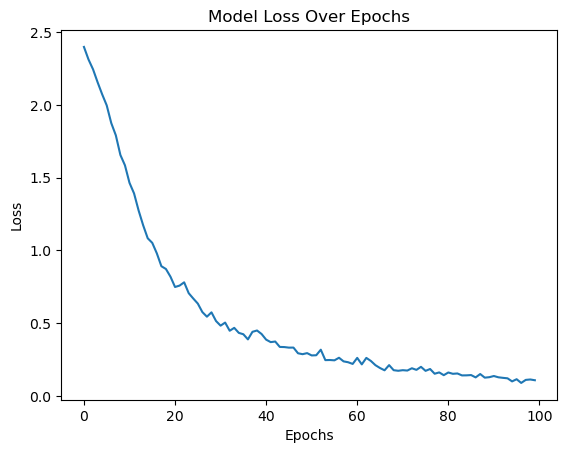

In [17]:
import matplotlib.pyplot as plt

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
